In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('data/11-Linear-Regression/USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


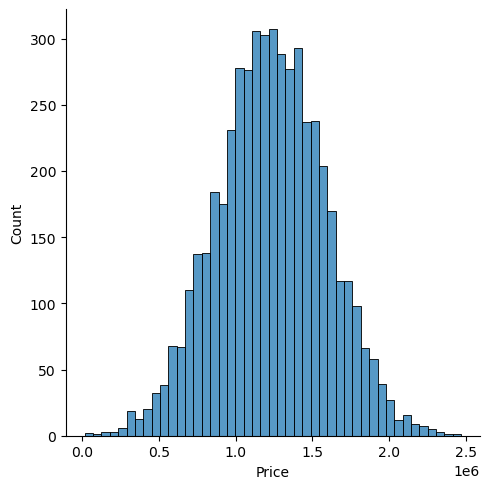

In [99]:
sns.displot(df['Price'])

<Axes: >

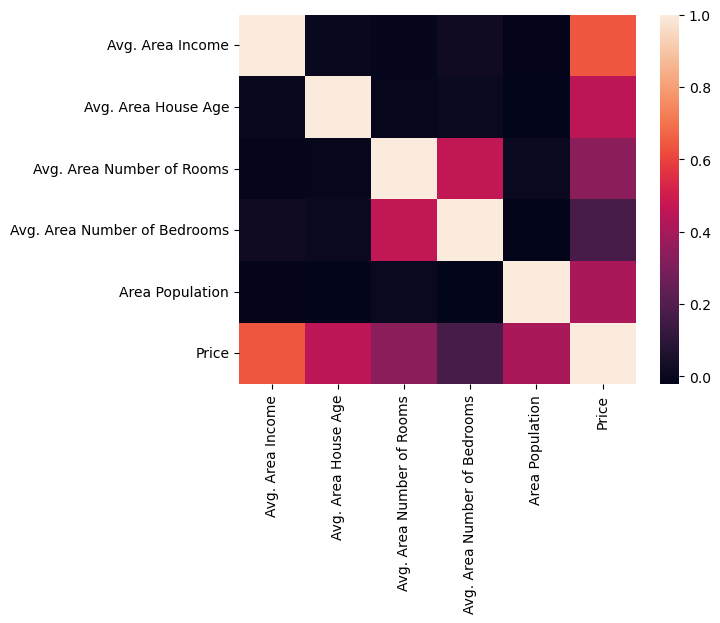

In [100]:
df.drop('Address', axis=1,inplace=True)
sns.heatmap(df.corr())

In [101]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [102]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [103]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [112]:
#approach #1
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

-2640159.7968526958
[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [110]:
#approach #2
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_const).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     6715.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:05:07   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.763e+04
Df Residuals:                    2994   BIC:                         7.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -2.64e+06   2.22e+04   -119.047      0.000   -2.68e+06    -2.6e+06
Avg. Area Income                21.5283      0.174    124.039      0.000      21.188      21.869
Avg. Area House Age           1.649e+05   1883.872     87.524      0.000    1.61e+05    1.69e+05
Avg. Area Number of Rooms     1.224e+05   2082.358     58.764      0.000    1.18e+05    1.26e+05
Avg. Area Number of Bedrooms  2233.8019   1683.015      1.327      0.185   -1066.181    5533.785
Area Population                 15.1504      0.184     82.391      0.000      14.790      15.511
==============================================================================
Omnibus:                        5.294   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.579
Skew:                           0.016   Prob(JB):                        0.101
Kurtosis:                       2.811   Cond. No.                     9.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""